In [75]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline
%config InlineBackend.figure_format = "svg"

from IPython.display import display, Math, Latex

In [76]:
import pandas as pd

data = pd.read_csv("fires_thefts.csv", names=["x", "y"])
print(data)

       x    y
0    6.2   29
1    9.5   44
2   10.5   36
3    7.7   37
4    8.6   53
5   34.1   68
6   11.0   75
7    6.9   18
8    7.3   31
9   15.1   25
10  29.1   34
11   2.2   14
12   5.7   11
13   2.0   11
14   2.5   22
15   4.0   16
16   5.4   27
17   2.2    9
18   7.2   29
19  15.1   30
20  16.5   40
21  18.4   32
22  36.2   41
23  39.7  147
24  18.5   22
25  23.3   29
26  12.2   46
27   5.6   23
28  21.8    4
29  21.6   31
30   9.0   39
31   3.6   15
32   5.0   32
33  28.6   27
34  17.4   32
35  11.3   34
36   3.4   17
37  11.9   46
38  10.5   42
39  10.7   43
40  10.8   34
41   4.8   19


In [77]:
x = data["x"].to_numpy()
y = data["y"].to_numpy()

In [78]:
# Funkcje rysujące wykres kropkowy oraz prostą regresyjną


def regdots(x, y):
    fig = plt.figure(figsize=(16 * 0.6, 9 * 0.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter(x, y, c="r", label="Dane")

    ax.set_xlabel("Liczba pożarów")
    ax.set_ylabel("Liczba włamań")
    ax.margins(0.05, 0.05)
    plt.ylim(0, max(y) + 5)
    plt.xlim(0, max(x) + 5)
    return fig


def regline(fig, fun, theta, x):
    ax = fig.axes[0]
    x0, x1 = min(x), max(x)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    ax.plot(
        X,
        Y,
        linewidth="2",
        label=(
            r"$y={theta0}{op}{theta1}x$".format(
                theta0=theta[0],
                theta1=(theta[1] if theta[1] >= 0 else -theta[1]),
                op="+" if theta[1] >= 0 else "-",
            )
        ),
    )


def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    # try-except block is a fix for a bug in Poly3DCollection
    try:
        fig.legend(handles, labels, fontsize="15", loc="lower right")
    except AttributeError:
        pass


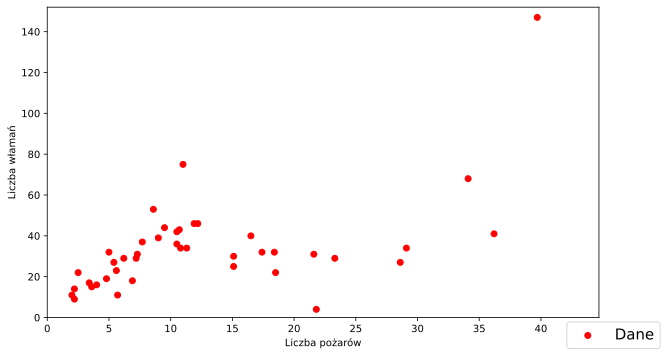

In [79]:
fig = regdots(x, y)
legend(fig)


In [80]:
# Hipoteza: funkcja liniowa jednej zmiennej


def h(theta, x):
    return theta[0] + theta[1] * x


In [81]:
# Przygotowanie interaktywnego wykresu

sliderTheta01 = widgets.FloatSlider(
    min=-10, max=20, step=0.1, value=0, description=r"$\theta_0$", width=300
)
sliderTheta11 = widgets.FloatSlider(
    min=-5, max=5, step=0.1, value=0, description=r"$\theta_1$", width=300
)


def slide1(theta0, theta1):
    fig = regdots(x, y)
    regline(fig, h, [theta0, theta1], x)
    legend(fig)


In [82]:
widgets.interact_manual(slide1, theta0=sliderTheta01, theta1=sliderTheta11)


interactive(children=(FloatSlider(value=0.0, description='$\\theta_0$', max=20.0, min=-10.0), FloatSlider(valu…

<function __main__.slide1(theta0, theta1)>

In [83]:
def J(h, theta, x, y):
    """Funkcja kosztu"""
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i]) ** 2 for i in range(m))


In [84]:
# Oblicz wartość funkcji kosztu i pokaż na wykresie


def regline2(fig, fun, theta, xx, yy):
    """Rysuj regresję liniową"""
    ax = fig.axes[0]
    x0, x1 = min(xx), max(xx)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    cost = J(fun, theta, xx, yy)
    ax.plot(
        X,
        Y,
        linewidth="2",
        label=(
            r"$y={theta0}{op}{theta1}x, \; J(\theta)={cost:.3}$".format(
                theta0=theta[0],
                theta1=(theta[1] if theta[1] >= 0 else -theta[1]),
                op="+" if theta[1] >= 0 else "-",
                cost=cost,
            )
        ),
    )


sliderTheta02 = widgets.FloatSlider(
    min=-10, max=20, step=0.1, value=0, description=r"$\theta_0$", width=300
)
sliderTheta12 = widgets.FloatSlider(
    min=-5, max=5, step=0.1, value=0, description=r"$\theta_1$", width=300
)


def slide2(theta0, theta1):
    fig = regdots(x, y)
    regline2(fig, h, [theta0, theta1], x, y)
    legend(fig)


In [85]:
widgets.interact_manual(slide2, theta0=sliderTheta02, theta1=sliderTheta12)


interactive(children=(FloatSlider(value=0.0, description='$\\theta_0$', max=20.0, min=-10.0), FloatSlider(valu…

<function __main__.slide2(theta0, theta1)>

In [86]:
# Wykres funkcji kosztu dla ustalonego theta_1=1.0


def costfun(fun, x, y):
    return lambda theta: J(fun, theta, x, y)


def costplot(hypothesis, x, y, theta1=1.0):
    fig = plt.figure(figsize=(16 * 0.6, 9 * 0.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlabel(r"$\theta_0$")
    ax.set_ylabel(r"$J(\theta)$")
    j = costfun(hypothesis, x, y)
    fun = lambda theta0: j([theta0, theta1])
    X = np.arange(-10, 10, 0.1)
    Y = [fun(x) for x in X]
    ax.plot(
        X, Y, linewidth="2", label=(r"$J(\theta_0, {theta1})$".format(theta1=theta1))
    )
    return fig


def slide3(theta1):
    fig = costplot(h, x, y, theta1)
    legend(fig)


sliderTheta13 = widgets.FloatSlider(
    min=-5, max=5, step=0.1, value=1.0, description=r"$\theta_1$", width=300
)


In [87]:
widgets.interact_manual(slide3, theta1=sliderTheta13)


interactive(children=(FloatSlider(value=1.0, description='$\\theta_1$', max=5.0, min=-5.0), Button(description…

<function __main__.slide3(theta1)>

In [88]:
# Wykres funkcji kosztu względem theta_0 i theta_1

from mpl_toolkits.mplot3d import Axes3D
import pylab

%matplotlib inline

def costplot3d(hypothesis, x, y, show_gradient=False):
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel(r'$J(\theta)$')
    
    j = lambda theta0, theta1: costfun(hypothesis, x, y)([theta0, theta1])
    X = np.arange(5, 25.1, 0.1)
    Y = np.arange(-1, 4.1, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = np.array([[J(hypothesis, [theta0, theta1], x, y) 
                    for theta0, theta1 in zip(xRow, yRow)] 
                   for xRow, yRow in zip(X, Y)])
    
    ax.plot_surface(X, Y, Z, rstride=2, cstride=8, linewidth=0.5,
                    alpha=0.5, cmap='jet', zorder=0,
                    label=r"$J(\theta)$")
    ax.view_init(elev=20., azim=-150)

    ax.set_xlim3d(5, 25);
    ax.set_ylim3d(-1, 4);
    ax.set_zlim3d(-100, 800);

    N = range(0, 800, 20)
    plt.contour(X, Y, Z, N, zdir='z', offset=-100, cmap='coolwarm', alpha=1)
    
    
    if show_gradient:
        ax.plot([3.0, 1.1],
                [3.0, 2.4],
                [263.0, 125.0], 
                color='green', alpha=1, linewidth=1.3, zorder=100)
        ax.scatter([3.0],
                   [3.0],
                   [263.0], 
                   c='g', s=30, marker='D', alpha=1, linewidth=1.3, zorder=100)

    ax.margins(0,0,0)
    fig.tight_layout()

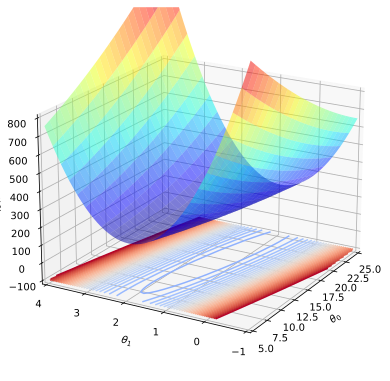

In [89]:
costplot3d(h, x, y)


In [90]:
# Wyświetlanie macierzy w LaTeX-u


def LatexMatrix(matrix):
    ltx = r"\left[\begin{array}"
    m, n = matrix.shape
    ltx += "{" + ("r" * n) + "}"
    for i in range(m):
        ltx += r" & ".join([("%.4f" % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r"\end{array}\right]"
    return ltx


In [91]:
def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    history = [
        [current_cost, theta]
    ]  # zapiszmy wartości kosztu i parametrów, by potem zrobić wykres
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha / float(m) * sum(h(theta, x[i]) - y[i] for i in range(m)),
            theta[1]
            - alpha / float(m) * sum((h(theta, x[i]) - y[i]) * x[i] for i in range(m)),
        ]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymczasowej
        try:
            prev_cost = current_cost
            current_cost = cost_fun(h, theta, x, y)
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        history.append([current_cost, theta])
    return theta, history


In [92]:
best_theta, history = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=0.003, eps=0.00001)

display(
    Math(
        r"\large\textrm{Wynik:}\quad \theta = "
        + LatexMatrix(np.matrix(best_theta).reshape(2, 1))
        + (r" \quad J(\theta) = %.4f" % history[-1][0])
        + r" \quad \textrm{po %d iteracjach}" % len(history)
    )
)


<IPython.core.display.Math object>

In [93]:

epss = [10.0**(-n) for n in range(0, 12)]
alpha=0.003
costs = []
lengths = []
for eps in epss:
    theta_best, history = gradient_descent(
        h, J, [0.0, 0.0], x, y, alpha, eps)
    cost = history[-1][0]
    steps = len(history)
    print(f"{eps=:7},  {cost=:15.3f},  {steps=:6}")
    costs.append(cost)
    lengths.append(steps)



eps=    1.0,  cost=        231.741,  steps=     4
eps=    0.1,  cost=        226.569,  steps=    52
eps=   0.01,  cost=        185.031,  steps=  1115
eps=  0.001,  cost=        180.872,  steps=  2179
eps= 0.0001,  cost=        180.456,  steps=  3242
eps=  1e-05,  cost=        180.415,  steps=  4306
eps=  1e-06,  cost=        180.411,  steps=  5369
eps=  1e-07,  cost=        180.410,  steps=  6433
eps=  1e-08,  cost=        180.410,  steps=  7496
eps=  1e-09,  cost=        180.410,  steps=  8560
eps=  1e-10,  cost=        180.410,  steps=  9623
eps=  1e-11,  cost=        180.410,  steps= 10687


In [94]:
def eps_cost_steps_plot(eps, costs, steps):
    """Wykres kosztu i liczby kroków w zależności od eps"""
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(eps, steps, "--s", color="green")
    ax2.plot(eps, costs, ":o", color="orange")
    ax1.set_xscale("log")
    ax1.set_xlabel("eps")
    ax1.set_ylabel("liczba kroków", color="green")
    ax2.set_ylabel("koszt", color="orange")
    plt.show()


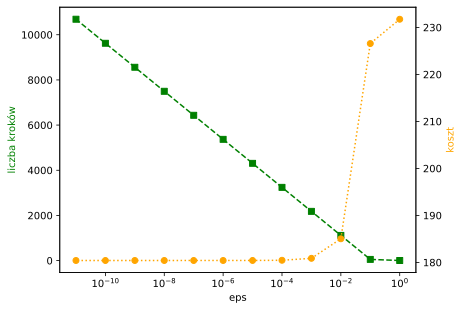

In [95]:
eps_cost_steps_plot(epss, costs, lengths)


In [104]:
example_x = [50, 100, 200]
print(best_theta)
example_y = [h(best_theta, ex) for ex in example_x]
for i in range(3):
    print(f"Liczba pozarów - {example_x[i]} "
    f"Przewidywalna liczba włamań - {example_y[i]}")

[16.835521154474677, 1.3214970549417684]
Liczba pozarów - 50 Przewidywalna liczba włamań - 82.91037390156309
Liczba pozarów - 100 Przewidywalna liczba włamań - 148.98522664865152
Liczba pozarów - 200 Przewidywalna liczba włamań - 281.13493214282835
